In [5]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [6]:

df1 = pd.read_csv('/Users/Ritik/Downloads/Project Dataset/Walmart/dataset_walmart-review-5mg.csv')
df2 = pd.read_csv('/Users/Ritik/Downloads/Project Dataset/Walmart/dataset_walmart-reviews-3mg.csv')
df3 = pd.read_csv('/Users/Ritik/Downloads/Project Dataset/Walmart/dataset_walmart-reviews-5mg-part2.csv')
df4 = pd.read_csv('/Users/Ritik/Downloads/Project Dataset/Walmart/dataset_walmart-reviews-10mg.csv')
df5 = pd.read_csv('/Users/Ritik/Downloads/Project Dataset/Walmart/dataset_walmart-reviews-12mg.csv')



In [7]:
#2.Shapes
df1.shape


(5360, 19)

In [8]:
df2.shape

(2904, 18)

In [9]:
df3.shape

(5371, 19)

In [10]:
df4.shape

(5210, 19)

In [11]:
df5.shape

(3926, 19)

In [20]:
#CONCAT ALL THE DATAFRAMES
df_combined = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [22]:
df_combined.shape

(22771, 19)

In [24]:
df_combined.isnull().sum()


authorId             2719
badges/0             6132
badges/1            20646
badges/2            22489
badges/3            22766
externalSource         22
itemType                0
negativeFeedback        0
positiveFeedback        0
productId               0
productName             0
productUrl              0
rating                  0
recommended         15458
reviewId                0
submissionTime          0
text                   12
title                3867
userNickname          781
dtype: int64

In [26]:
df_combined.head(50)

,authorId,badges/0,badges/1,badges/2,badges/3,externalSource,itemType,negativeFeedback,positiveFeedback,productId,productName,productUrl,rating,recommended,reviewId,submissionTime,text,title,userNickname
0,799f77d61173cb643ec43c0c7172fa06,NaN,NaN,NaN,NaN,bazaarvoice,Review,0,0,315381296,"Safrel Melatonin 3mg Fast Dissolve Tablets, Ve...",https://www.walmart.com/ip/Safrel-Melatonin-3m...,1,NaN,346283074,2024-06-04,"The bottle arrived empty, with no pills in it ...",Empty Sealed Bottle,Craig
1,197407771f8c654a5902759a6ea81daf,VerifiedPurchaser,NaN,NaN,NaN,bazaarvoice,Review,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,https://www.walmart.com/ip/NOW-Foods-Melatonin...,3,NaN,354459903,2024-08-17,Cap doesn't stay on. As far as medicine itself...,NaN,CCCK
2,e598501d03c2852db9ab03a60e62fb4f,IncentivizedReviewYes,VerifiedPurchaser,PrizeIncentive,NaN,bazaarvoice,Review,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,https://www.walmart.com/ip/NOW-Foods-Melatonin...,5,NaN,327925776,2023-12-14,Have other products from them. I was taking no...,Good quality products.,Lois
3,a70409a6bb713c48dd2c52c3b6e439b5,VerifiedPurchaser,NaN,NaN,NaN,bazaarvoice,Review,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,https://www.walmart.com/ip/NOW-Foods-Melatonin...,4,NaN,353889276,2024-08-11,"effective product, if you want to speed up eff...",honest,Joseph
4,a859180031748475ed5970e3700a068897db19b3e618dd...,IncentivizedReviewYes,VerifiedPurchaser,PrizeIncentive,NaN,bazaarvoice,Review,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,https://www.walmart.com/ip/NOW-Foods-Melatonin...,5,NaN,352882189,2024-08-02,This product works exceptionally well. It's ...,Great,Barbie
5,a0240e350a9b06f00df193d32c4d21e2ecb4e62440bb5c...,IncentivizedReviewYes,VerifiedPurchaser,PrizeIncentive,NaN,bazaarvoice,Review,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,https://www.walmart.com/ip/NOW-Foods-Melatonin...,5,NaN,353295782,2024-08-06,Sleeping through night and it is helping noctu...,The sustained release is working!,JLC
6,c2612803b1e8b8a8a853f85f25bce6c282593e8fdf2f3e...,IncentivizedReviewYes,VerifiedPurchaser,PrizeIncentive,NaN,bazaarvoice,Review,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,https://www.walmart.com/ip/NOW-Foods-Melatonin...,5,NaN,346800955,2024-06-10,We used to take 10mg of another time release b...,NaN,Terrence
7,9edd6ca8a4d63b023556832dfdb15e86,VerifiedPurchaser,PrizeIncentive,NaN,NaN,bazaarvoice,Review,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,https://www.walmart.com/ip/NOW-Foods-Melatonin...,5,NaN,317751956,2023-09-15,Great product at a good price; fast and free s...,Helps me sleep well,likesthingsthatfitwell
8,NaN,VerifiedPurchaser,VerifiedPurchaser,NaN,NaN,bazaarvoice,Review,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,https://www.walmart.com/ip/NOW-Foods-Melatonin...,4,True,232661915,2022-12-13,Ok,Melatonin,Patricia
9,NaN,NaN,NaN,NaN,NaN,aspectiva,Review,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,https://www.walmart.com/ip/NOW-Foods-Melatonin...,5,NaN,f7a27381-b494-30b9-92ed-28019727f591,2023-11-21,great product,NaN,Valee More


In [27]:
df_combined.columns

Index(['authorId', 'badges/0', 'badges/1', 'badges/2', 'badges/3',
       'externalSource', 'itemType', 'negativeFeedback', 'positiveFeedback',
       'productId', 'productName', 'productUrl', 'rating', 'recommended',
       'reviewId', 'submissionTime', 'text', 'title', 'userNickname'],
      dtype='object')

In [29]:
#data cleaning
#dropping duplicates
df_combined = df_combined.drop_duplicates(subset=['productId','authorId','productName','title','text','submissionTime'])


#dropping irrelevant columns
columns_to_remove = ['authorId', 'externalSource', 'reviewId', 'productUrl', 'userNickname','badges/0','badges/1','badges/2','badges/3','itemType']
df_combined = df_combined.drop(columns=[col for col in columns_to_remove if col in df_combined.columns])


In [31]:
df_combined.shape

(13164, 9)

In [34]:
df_combined.columns

Index(['negativeFeedback', 'positiveFeedback', 'productId', 'productName',
       'rating', 'recommended', 'submissionTime', 'text', 'title'],
      dtype='object')

In [36]:
df_combined.head()

,negativeFeedback,positiveFeedback,productId,productName,rating,recommended,submissionTime,text,title
0,0,0,315381296,"Safrel Melatonin 3mg Fast Dissolve Tablets, Ve...",1,NaN,2024-06-04,"The bottle arrived empty, with no pills in it ...",Empty Sealed Bottle
1,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,3,NaN,2024-08-17,Cap doesn't stay on. As far as medicine itself...,NaN
2,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,5,NaN,2023-12-14,Have other products from them. I was taking no...,Good quality products.
3,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,4,NaN,2024-08-11,"effective product, if you want to speed up eff...",honest
4,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,5,NaN,2024-08-02,This product works exceptionally well. It's ...,Great


In [38]:
df_combined.isnull().sum()

negativeFeedback       0
positiveFeedback       0
productId              0
productName            0
rating                 0
recommended         8422
submissionTime         0
text                   8
title               2096
dtype: int64

In [40]:
df_combined.info();

<class 'pandas.core.frame.DataFrame'>
Index: 13164 entries, 0 to 22770
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   negativeFeedback  13164 non-null  int64 
 1   positiveFeedback  13164 non-null  int64 
 2   productId         13164 non-null  int64 
 3   productName       13164 non-null  object
 4   rating            13164 non-null  int64 
 5   recommended       4742 non-null   object
 6   submissionTime    13164 non-null  object
 7   text              13156 non-null  object
 8   title             11068 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.0+ MB


In [42]:
# Replace missing values with appropriate values, only where missing values exist
for column in df_combined.columns:
    if df_combined[column].isnull().any():  
        if df_combined[column].dtype == 'object':  # For non-integer columns (objects)
            df_combined[column] = df_combined[column].replace(pd.NA)  # Replace with None for objects
        elif df_combined[column].dtype in ['int64', 'float64']:  #
            df_combined[column] = df_combined[column].fillna(np.nan)  # Replace with NaN for integers and floats

#reset index
df_combined = df_combined.reset_index(drop=True)


/var/folders/22/zwwcnjbn3gb1gt52wl97gtxr0000gp/T/ipykernel_17527/1427525663.py:5: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df_combined[column] = df_combined[column].replace(pd.NA)  # Replace with None for objects


In [44]:
df_combined

,negativeFeedback,positiveFeedback,productId,productName,rating,recommended,submissionTime,text,title
0,0,0,315381296,"Safrel Melatonin 3mg Fast Dissolve Tablets, Ve...",1,NaN,2024-06-04,"The bottle arrived empty, with no pills in it ...",Empty Sealed Bottle
1,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,3,NaN,2024-08-17,Cap doesn't stay on. As far as medicine itself...,Empty Sealed Bottle
2,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,5,NaN,2023-12-14,Have other products from them. I was taking no...,Good quality products.
3,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,4,NaN,2024-08-11,"effective product, if you want to speed up eff...",honest
4,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,5,NaN,2024-08-02,This product works exceptionally well. It's ...,Great
...,...,...,...,...,...,...,...,...,...
13159,0,2,767884593,Vicks ZzzQuil Pure Zzzs All Night Extended Rel...,3,True,2020-08-07,"I have a severe insomnia, I used to take eszop...",It somewhat works?
13160,2,1,767884593,Vicks ZzzQuil Pure Zzzs All Night Extended Rel...,5,True,2020-07-14,Expensive and im not noticing sleeping better ...,It somewhat works?
13161,0,1,767884593,Vicks ZzzQuil Pure Zzzs All Night Extended Rel...,5,True,2020-05-15,[This review was collected as part of a promot...,No grogginess! Melatonin Sleep Aid
13162,0,1,767884593,Vicks ZzzQuil Pure Zzzs All Night Extended Rel...,5,True,2020-05-14,I am very satisfied with ZzzQuil™ PURE Zzzs™ A...,Satisfied


In [46]:
#3. Extract MG details from productName
def extract_mg(title):
    match = re.search(r'\d+\s?mg', str(title).lower())  # Capture both formats: '5mg' and '5 mg'
    return match.group(0) if match else None

#extraction to the productName column
df_combined['dose'] = df_combined['productName'].apply(extract_mg)
df_combined['dose'] = df_combined['dose'].str.replace(r'(\d+)mg', r'\1 mg', regex=True)

print(df_combined['dose'].value_counts())

dose
5 mg     4069
10 mg    3619
3 mg     1742
12 mg     849
1 mg      357
20 mg     322
Name: count, dtype: int64


In [48]:
df_combined['dose'].value_counts().sum()

10958

In [50]:
df_combined.head(50)

,negativeFeedback,positiveFeedback,productId,productName,rating,recommended,submissionTime,text,title,dose
0,0,0,315381296,"Safrel Melatonin 3mg Fast Dissolve Tablets, Ve...",1,NaN,2024-06-04,"The bottle arrived empty, with no pills in it ...",Empty Sealed Bottle,3 mg
1,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,3,NaN,2024-08-17,Cap doesn't stay on. As far as medicine itself...,Empty Sealed Bottle,5 mg
2,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,5,NaN,2023-12-14,Have other products from them. I was taking no...,Good quality products.,5 mg
3,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,4,NaN,2024-08-11,"effective product, if you want to speed up eff...",honest,5 mg
4,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,5,NaN,2024-08-02,This product works exceptionally well. It's ...,Great,5 mg
5,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,5,NaN,2024-08-06,Sleeping through night and it is helping noctu...,The sustained release is working!,5 mg
6,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,5,NaN,2024-06-10,We used to take 10mg of another time release b...,The sustained release is working!,5 mg
7,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,5,NaN,2023-09-15,Great product at a good price; fast and free s...,Helps me sleep well,5 mg
8,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,4,True,2022-12-13,Ok,Melatonin,5 mg
9,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,5,True,2023-11-21,great product,Melatonin,5 mg


In [52]:
valid_doses = df_combined['dose'].dropna().replace('', float('NaN')).dropna()

# Filter out invalid entries
valid_doses = valid_doses[valid_doses.str.contains('mg', na=False)]

# Extract numerical values and create a sorted DataFrame
dose_counts = valid_doses.value_counts().reset_index()
dose_counts.columns = ['dose', 'count']
dose_counts['mg'] = dose_counts['dose'].str.replace(' mg', '').astype(float)

dose_counts = dose_counts.sort_values('mg')

#sorting in ascendin order
dose_counts = dose_counts.sort_values('mg').reset_index(drop=True)


#total number of valid doses
total_doses = dose_counts['count'].sum()

dose_counts

,dose,count,mg
0,1 mg,357,1.0
1,3 mg,1742,3.0
2,5 mg,4069,5.0
3,10 mg,3619,10.0
4,12 mg,849,12.0
5,20 mg,322,20.0


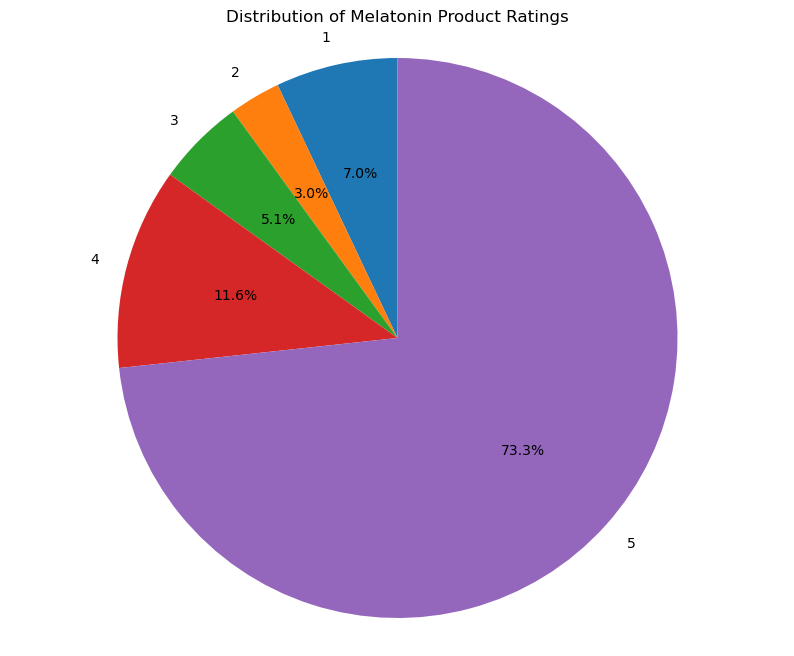

/var/folders/22/zwwcnjbn3gb1gt52wl97gtxr0000gp/T/ipykernel_17527/625272157.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dose_counts.index.astype(str), y=dose_counts.values, palette='viridis')


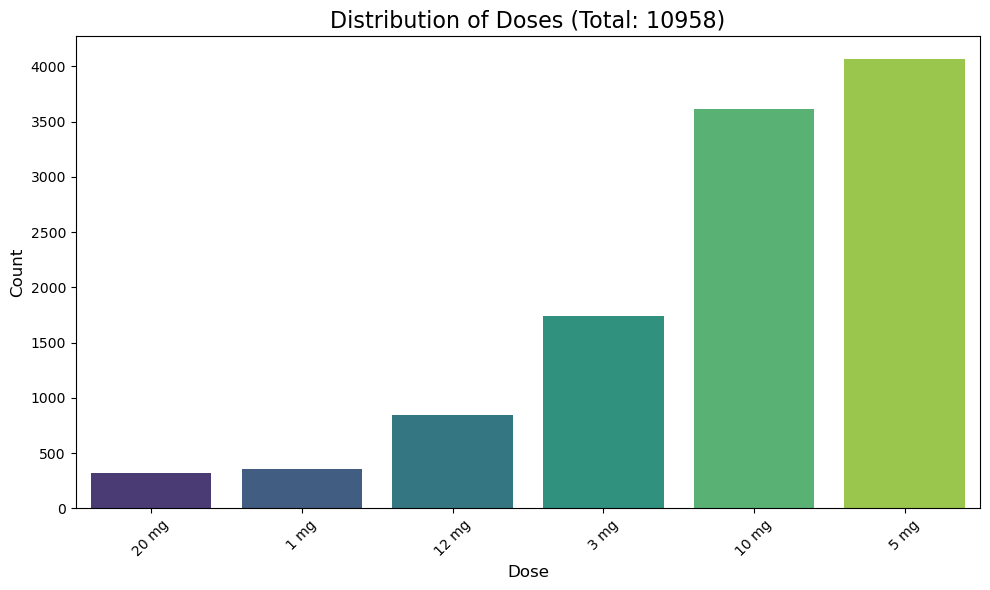

In [122]:
df_combined_cleaned = df_combined[df_combined['dose'] != -1]
#Univariate 
rating_counts = df_combined['rating'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Melatonin Product Ratings')
plt.axis('equal')
plt.show()


#-------------------

df_combined_cleaned['dose'] = df_combined_cleaned['dose'].replace('', float('NaN')).fillna(float('NaN'))

# Drop rows where 'dose' is NaN
df_combined_cleaned = df_combined_cleaned.dropna(subset=['dose'])

dose_counts = df_combined_cleaned['dose'].value_counts(ascending=True)

#barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=dose_counts.index.astype(str), y=dose_counts.values, palette='viridis')
plt.title(f'Distribution of Doses (Total: {int(dose_counts.sum())})', fontsize=16)
plt.xlabel('Dose', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13164 entries, 0 to 13163
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   negativeFeedback  13164 non-null  int64 
 1   positiveFeedback  13164 non-null  int64 
 2   productId         13164 non-null  int64 
 3   productName       13164 non-null  object
 4   rating            13164 non-null  int64 
 5   recommended       13156 non-null  object
 6   submissionTime    13164 non-null  object
 7   text              13164 non-null  object
 8   title             13164 non-null  object
 9   dose              10958 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.0+ MB


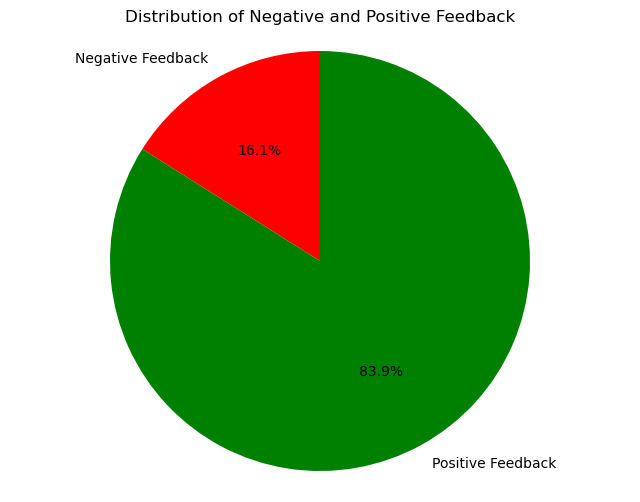

In [56]:
#Bivariate Analysis

negative_feedback = df_combined['negativeFeedback'].sum()
positive_feedback = df_combined['positiveFeedback'].sum()
feedback_data = [negative_feedback, positive_feedback]
labels = ['Negative Feedback', 'Positive Feedback']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(feedback_data, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Distribution of Negative and Positive Feedback')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()


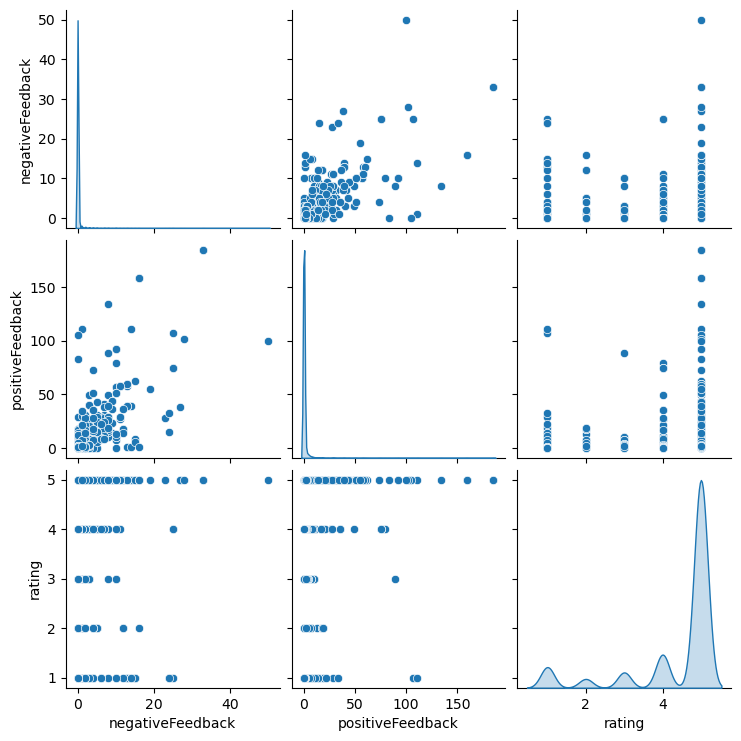

In [57]:
#Multivariate Variables
# Pairplot
sns.pairplot(df_combined[['negativeFeedback', 'positiveFeedback', 'rating']], diag_kind='kde')
plt.show()

In [58]:
##NLP Cleaning 

In [59]:
#df_combined.info()

In [60]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string


In [61]:
data = df_combined

# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Define custom stop words and additional preprocessing settings
custom_stopwords = set(stopwords.words('english')).union({"package", "product", "item"})

def clean_text(text):
    if pd.isnull(text):
        return ""

    #Lowercase
    text = text.lower()

    #punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)
    #print(tokens)
   
    # Remove stopwords
    tokens = [word for word in tokens if word not in custom_stopwords]
    #print(tokens)
    
    # Remove numbers
    tokens = [word for word in tokens if not word.isdigit()]

    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Rejoin tokens into a cleaned string
    return " ".join(tokens)

# cleaning
if 'text' in data.columns:
    data['cleaned_text'] = data['text'].apply(clean_text)
if 'title' in data.columns:
    data['cleaned_title'] = data['title'].apply(clean_text)

data.fillna("", inplace=True)


#drop column
data = data.drop(columns = ['text','title'])

In [63]:
data

,negativeFeedback,positiveFeedback,productId,productName,rating,recommended,submissionTime,dose,cleaned_text,cleaned_title
0,0,0,315381296,"Safrel Melatonin 3mg Fast Dissolve Tablets, Ve...",1,,2024-06-04,3 mg,bottle arrived empty pill safety seal adhered ...,empty sealed bottle
1,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,3,,2024-08-17,5 mg,cap doesnt stay far medicine help somewhat sti...,empty sealed bottle
2,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,5,,2023-12-14,5 mg,product taking nontime released one another br...,good quality product
3,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,4,,2024-08-11,5 mg,effective want speed effect smash tablet fisrt,honest
4,0,0,358471439,NOW Foods - Melatonin Sustained Release 5 mg. ...,5,,2024-08-02,5 mg,work exceptionally well gentle effective,great
...,...,...,...,...,...,...,...,...,...,...
13159,0,2,767884593,Vicks ZzzQuil Pure Zzzs All Night Extended Rel...,3,True,2020-08-07,,severe insomnia used take eszopiclone bad side...,somewhat work
13160,2,1,767884593,Vicks ZzzQuil Pure Zzzs All Night Extended Rel...,5,True,2020-07-14,,expensive im noticing sleeping better sleeping...,somewhat work
13161,0,1,767884593,Vicks ZzzQuil Pure Zzzs All Night Extended Rel...,5,True,2020-05-15,,review collected part promotion zzzquil™ pure ...,grogginess melatonin sleep aid
13162,0,1,767884593,Vicks ZzzQuil Pure Zzzs All Night Extended Rel...,5,True,2020-05-14,,satisfied zzzquil™ pure zzzs™ night melatonin ...,satisfied


[(('part', 'promotion'), 1852), (('review', 'collected'), 1851), (('collected', 'part'), 1851), (('fall', 'asleep'), 1636), (('work', 'well'), 796), (('help', 'sleep'), 776), (('night', 'sleep'), 631), (('stay', 'asleep'), 627), (('work', 'great'), 598), (('help', 'fall'), 578)]


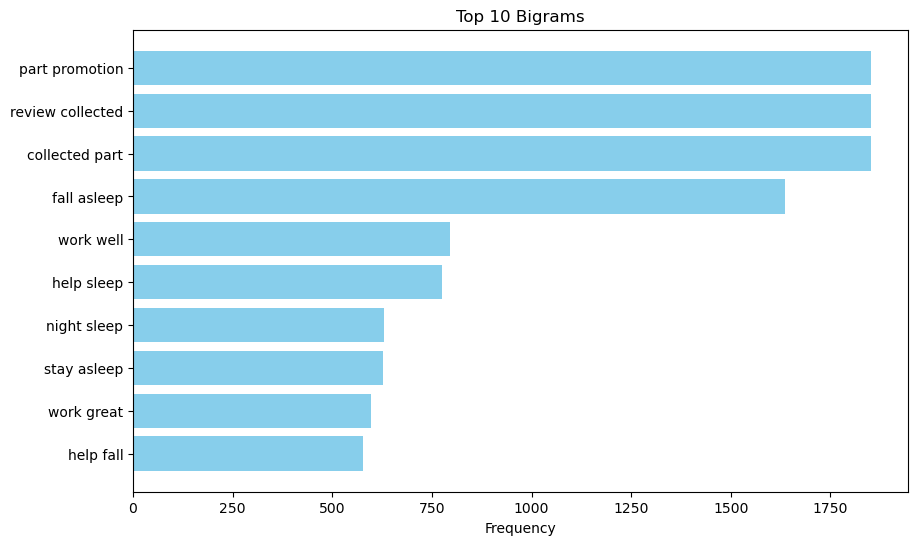

In [270]:
from nltk.util import ngrams

#n-gram generation
def generate_ngrams(text, n=2):
    tokens = word_tokenize(text)
    return list(ngrams(tokens, n))

#Generate bigrams 
data['bigrams'] = data['cleaned_text'].apply(lambda x: generate_ngrams(x, n=2))

#Count bigrams
all_bigrams = [bigram for sublist in data['bigrams'] for bigram in sublist]
bigram_counts = Counter(all_bigrams)
top_10_bigrams = bigram_counts.most_common(10)

print(top_10_bigrams)

bigram_labels = [' '.join(bigram) for bigram, _ in top_10_bigrams]
bigram_freqs = [freq for _, freq in top_10_bigrams]


plt.figure(figsize=(10, 6))
plt.barh(bigram_labels, bigram_freqs, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Bigrams')
plt.gca().invert_yaxis()  # To display the most common bigram at the top
plt.show()

In [253]:
# Combine cleaned text
all_words = " ".join(data['cleaned_text']).split()
word_counts = Counter(all_words)

#top 10 most common words
top_50_words = word_counts.most_common(50)

print(top_50_words)

[('sleep', 7547), ('work', 4478), ('melatonin', 3940), ('night', 3740), ('asleep', 3579), ('help', 3468), ('take', 2883), ('great', 2855), ('good', 2612), ('taste', 2412), ('like', 2310), ('review', 2080), ('get', 2055), ('part', 1958), ('time', 1858), ('promotion', 1853), ('collected', 1851), ('fall', 1821), ('well', 1801), ('one', 1677), ('gummies', 1601), ('really', 1463), ('love', 1280), ('wake', 1255), ('dont', 1250), ('taking', 1231), ('better', 1180), ('hour', 1149), ('brand', 1138), ('ive', 1098), ('day', 1095), ('tried', 1081), ('im', 1078), ('tablet', 1072), ('recommend', 1061), ('would', 1047), ('sleeping', 1046), ('fast', 1001), ('feel', 993), ('use', 976), ('need', 928), ('flavor', 917), ('mg', 886), ('go', 879), ('pill', 846), ('morning', 839), ('year', 809), ('bed', 809), ('easy', 801), ('much', 787)]


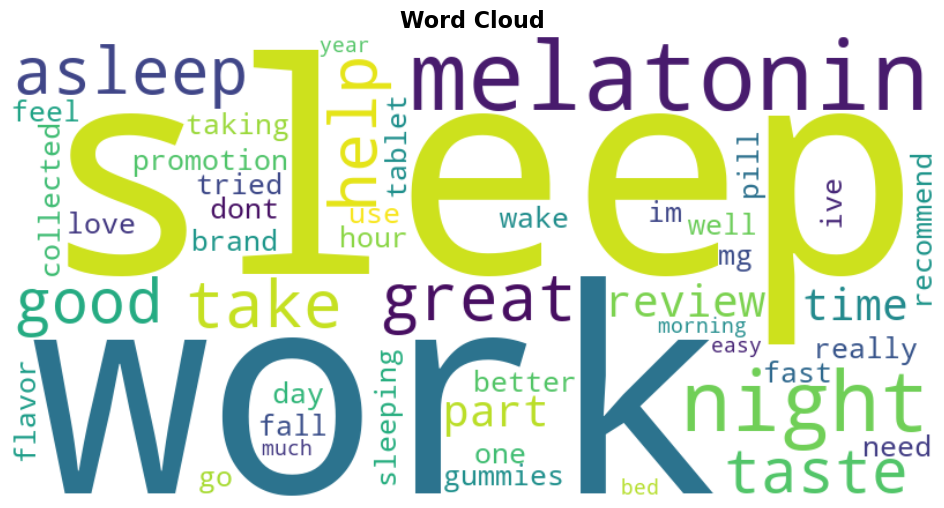

In [255]:
top_50_words_text = " ".join([word for word, _ in top_50_words])

wordcloud = WordCloud(
    width=800, height=400, background_color='white', colormap='viridis'
).generate(top_10_words_text)

# Visualize the Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud', fontsize=16, fontweight='bold')
plt.show()

In [69]:
df_filtered = df_combined[df_combined['dose'].str.contains('mg', na=False)]
#df_filtered['dose']

In [70]:
from textblob import TextBlob

# Function to get sentiment polarity and subjectivity
def get_sentiment(text):
    if isinstance(text, str):  
        analysis = TextBlob(text)
        return analysis.sentiment.polarity, analysis.sentiment.subjectivity
    else:
        return None, None  # Return None for non-string values

df_filtered = df_filtered.copy()

# Extract sentiment polarity and subjectivity
polarity, subjectivity = zip(*df_filtered['text'].apply(get_sentiment))

df_filtered['polarity'] = polarity
df_filtered['subjectivity'] = subjectivity
#print(df_filtered[['text', 'polarity', 'subjectivity']].head())


       polarity  subjectivity
dose                         
1 mg   0.250054      0.483232
10 mg  0.259566      0.487566
12 mg  0.296754      0.522540
20 mg  0.249427      0.502819
3 mg   0.266776      0.495296
5 mg   0.271345      0.494617


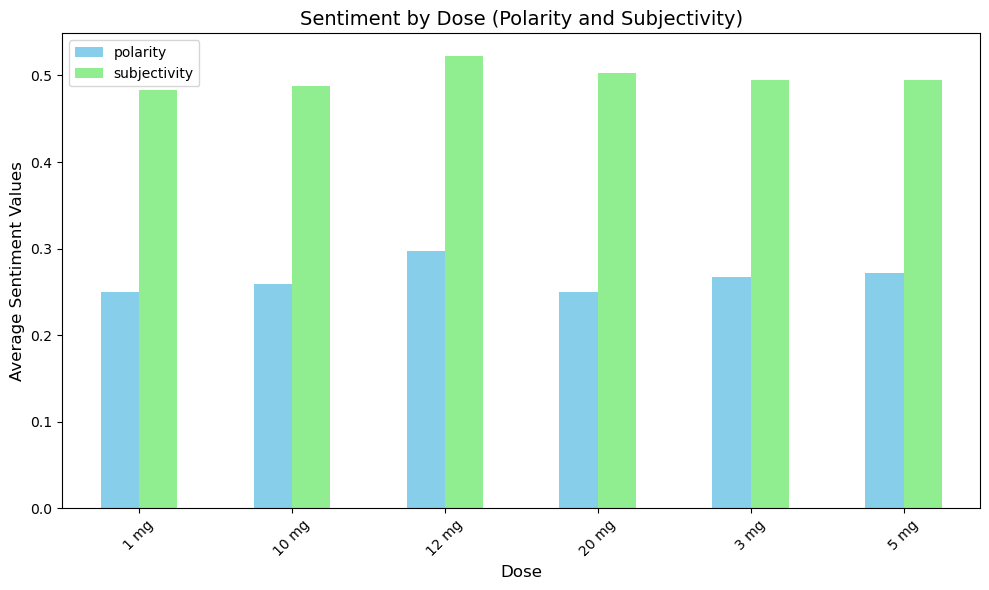

In [71]:
#11.Check Sentiment of Each Dose
# Sentiment by dose
sentiment_by_dose = df_filtered.groupby('dose')[['polarity', 'subjectivity']].mean()
print(sentiment_by_dose.dropna())

fig, ax = plt.subplots(figsize=(10, 6))
sentiment_by_dose.plot(kind='bar', ax=ax, color=['skyblue', 'lightgreen'])

ax.set_title('Sentiment by Dose (Polarity and Subjectivity)', fontsize=14)
ax.set_xlabel('Dose', fontsize=12)
ax.set_ylabel('Average Sentiment Values', fontsize=12)

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [72]:
#12
ratings_by_dose = df_filtered.groupby('dose')['rating'].value_counts().unstack(fill_value=0)
print(ratings_by_dose)


rating    1    2    3    4     5
dose                            
1 mg     21   11   14   38   273
10 mg   284  123  192  400  2620
12 mg    46   30   30  110   633
20 mg    27    9   21   40   225
3 mg    104   40   85  187  1326
5 mg    290  111  215  499  2954


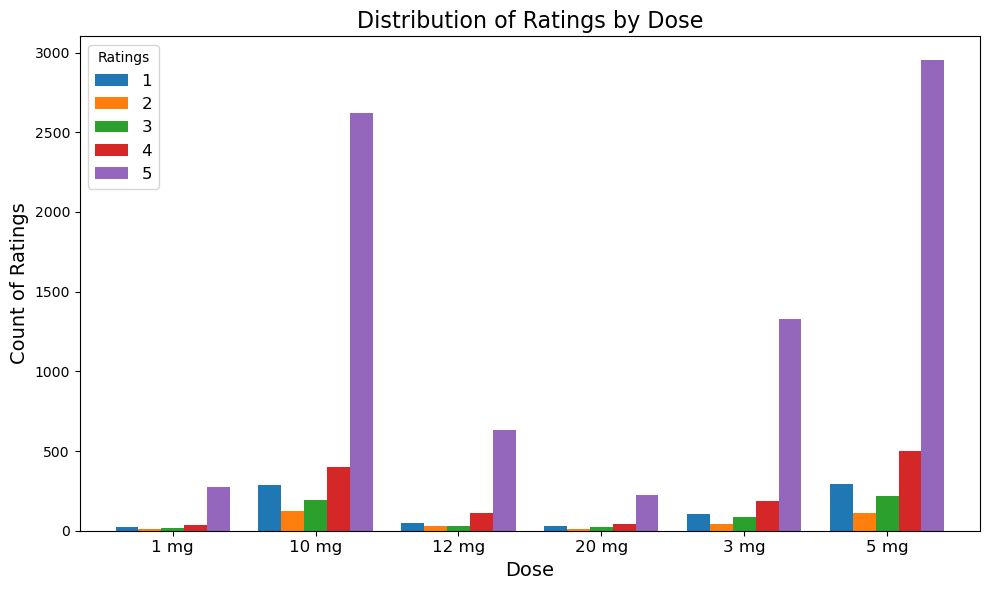

In [73]:
#Bargraph showing distribution of ratings for each dose
ratings_by_dose.plot(kind='bar', figsize=(10, 6), width=0.8)

plt.title('Distribution of Ratings by Dose', fontsize=16)
plt.xlabel('Dose', fontsize=14)
plt.ylabel('Count of Ratings', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Ratings', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [74]:
#13. Average rating by dose
average_rating_by_dose = df_filtered.groupby('dose')['rating'].mean()
print(average_rating_by_dose)


dose
1 mg     4.487395
10 mg    4.367505
12 mg    4.477032
20 mg    4.326087
3 mg     4.487371
5 mg     4.404768
Name: rating, dtype: float64


/var/folders/22/zwwcnjbn3gb1gt52wl97gtxr0000gp/T/ipykernel_17527/21116194.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating_by_dose.index, y=average_rating_by_dose.values, palette='viridis')


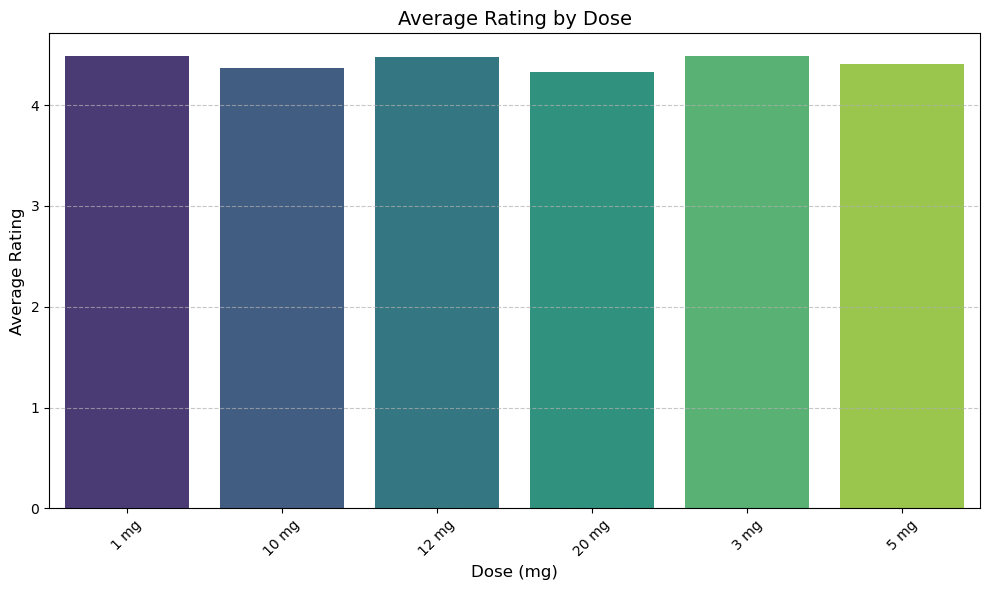

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(x=average_rating_by_dose.index, y=average_rating_by_dose.values, palette='viridis')

plt.xlabel("Dose (mg)", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Average Rating by Dose", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


In [76]:
#14 How Users Take Melatonin

# Filter text for timing
df_filtered.loc[:, 'bed_time_phrases'] = df_filtered['text'].str.extract(r'(\d+\s+minutes\s+before\s+bed)', expand=False)
bed_time_phrases_counts = df_filtered['bed_time_phrases'].value_counts()
print(bed_time_phrases_counts)


bed_time_phrases
30 minutes before bed    42
20 minutes before bed    12
45 minutes before bed     4
15 minutes before bed     2
60 minutes before bed     1
Name: count, dtype: int64


/var/folders/22/zwwcnjbn3gb1gt52wl97gtxr0000gp/T/ipykernel_17527/4112546123.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


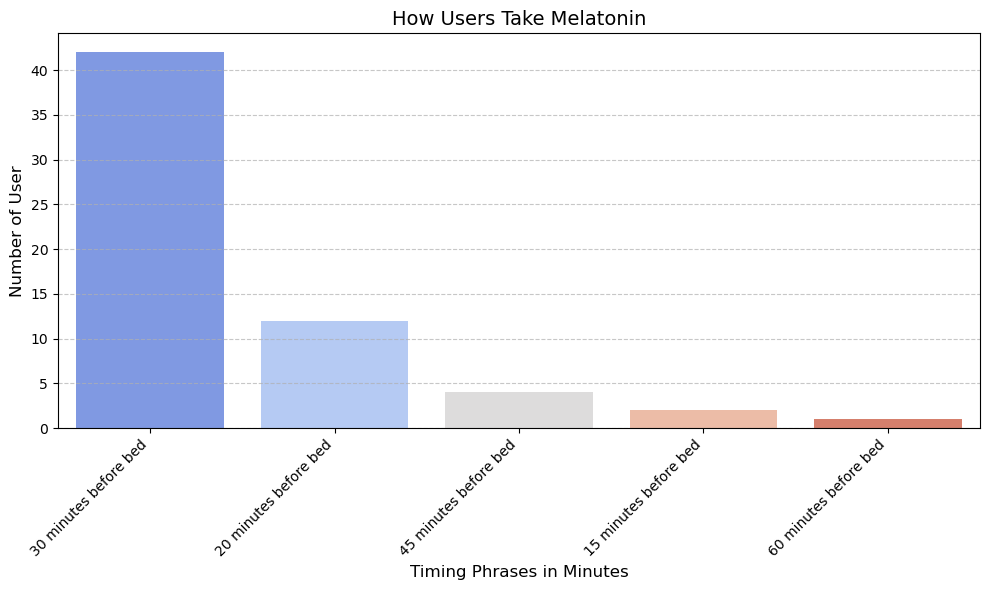

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=bed_time_phrases_counts.index, 
    y=bed_time_phrases_counts.values, 
    palette="coolwarm"
)

plt.xlabel("Timing Phrases in Minutes", fontsize=12)
plt.ylabel("Number of User", fontsize=12)
plt.title("How Users Take Melatonin", fontsize=14)
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [78]:
#15. Users' Reactions to Taking Melatonin

from sklearn.feature_extraction.text import CountVectorizer

# Extract bigrams and trigrams
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english')
ngrams = vectorizer.fit_transform(df_filtered['text'])

# Sum frequencies and display top n-grams
ngram_counts = pd.DataFrame(ngrams.toarray(), columns=vectorizer.get_feature_names_out()).sum(axis=0).sort_values(ascending=False)
print(ngram_counts.head(10))

fall asleep                   1391
collected promotion           1365
review collected              1365
review collected promotion    1365
stay asleep                    519
help sleep                     473
falling asleep                 459
helps sleep                    406
night sleep                    342
works great                    335
dtype: int64


In [79]:
#17.Sentiment Analysis: Positive, Neutral, Negative

df_filtered.loc[:, 'sentiment'] = df_filtered['polarity'].apply(
    lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral')
)

# Count each sentiment
sentiment_distribution = df_filtered['sentiment'].value_counts()
print(sentiment_distribution)


sentiment
positive    8374
neutral     1370
negative    1214
Name: count, dtype: int64


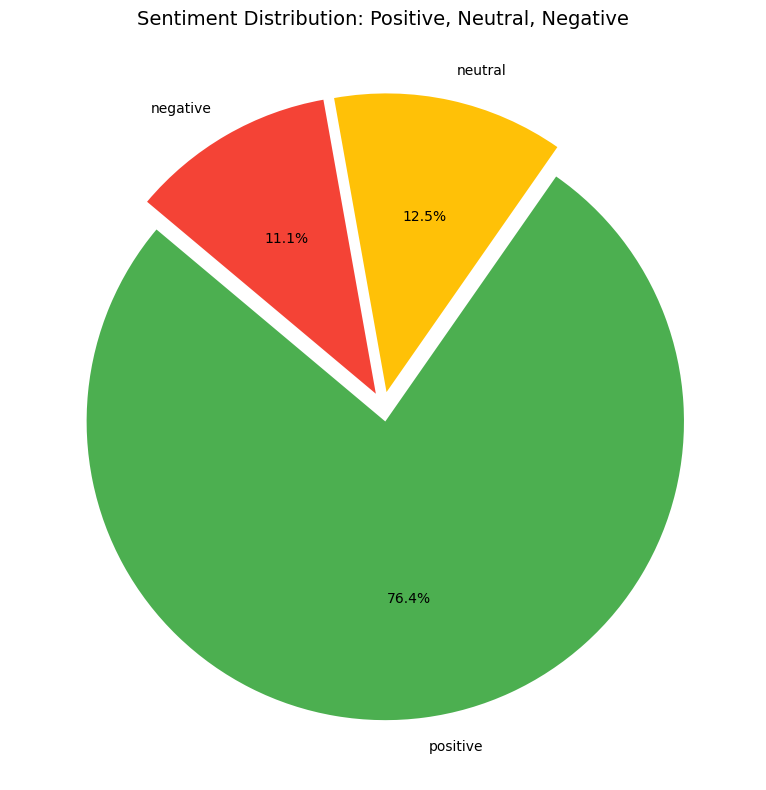

In [80]:
sentiment_distribution = df_filtered['sentiment'].value_counts()

#pie chart
plt.figure(figsize=(8, 8))
colors = ['#4CAF50', '#FFC107', '#F44336']  # Positive, Neutral, Negative colors
plt.pie(
    sentiment_distribution, 
    labels=sentiment_distribution.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    explode=(0.05, 0.05, 0.05)
)

# Adding a title
plt.title('Sentiment Distribution: Positive, Neutral, Negative', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


In [81]:
#16 Intensity of User Emotions

#extracring adjectives
df_filtered['adjectives'] = df_filtered['text'].apply(
    lambda x: [word for word, tag in TextBlob(x).tags if tag == 'JJ']#includes the word that are marked as adjectives in Textblob
)

adjective_counts = pd.Series([adj for adj_list in df_filtered['adjectives'] for adj in adj_list]).value_counts()
print(adjective_counts.head(10))


good         2044
great        1953
sleep         977
asleep        753
other         744
easy          548
next          452
natural       445
effective     441
able          381
Name: count, dtype: int64


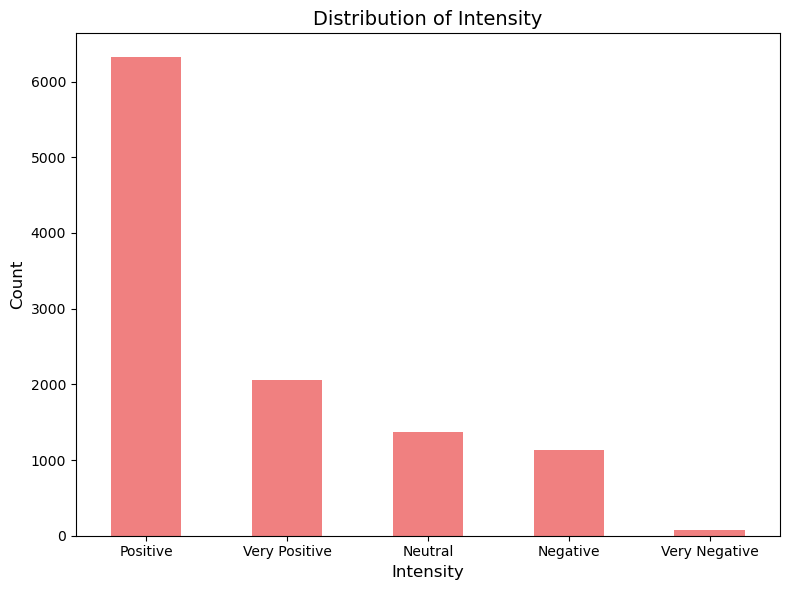

In [82]:
def polarity_intensity(polarity):
    if polarity > 0.5:
        return 'Very Positive'
    elif polarity > 0:
        return 'Positive'
    elif polarity < -0.5:
        return 'Very Negative'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df_filtered['intensity'] = df_filtered['polarity'].apply(polarity_intensity)
intensity_counts = df_filtered['intensity'].value_counts()

plt.figure(figsize=(8, 6))
intensity_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Intensity', fontsize=14)
plt.xlabel('Intensity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

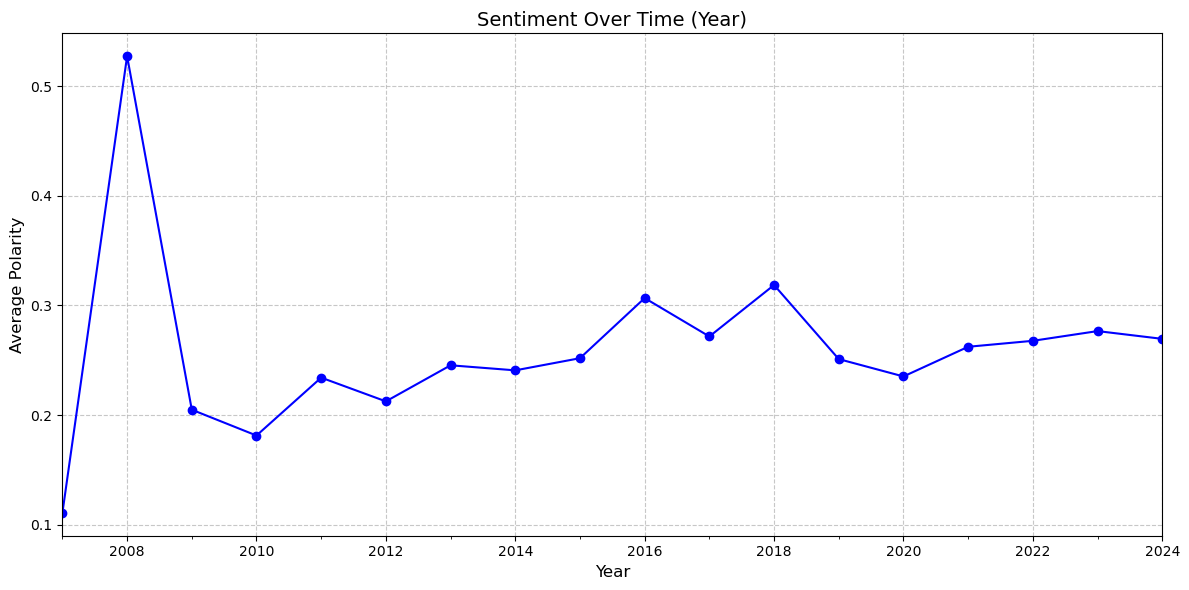

In [83]:
#18.  Check Sentiment Over Time
# Convert 'submissionTime' to datetime
df_filtered['submissionTime'] = pd.to_datetime(df_filtered['submissionTime'], errors='coerce')

# Drop invalid rows
df_filtered = df_filtered.dropna(subset=['submissionTime'])

# Group by month and calculate average polarity
sentiment_over_time = (
    df_filtered.groupby(df_filtered['submissionTime'].dt.to_period('Y'))['polarity']
    .mean()
)

#print(sentiment_over_time)

sentiment_over_time.index = sentiment_over_time.index.to_timestamp()

# Line plot
plt.figure(figsize=(12, 6))
sentiment_over_time.plot(kind='line', marker='o', color='blue')

plt.title('Sentiment Over Time (Year)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Polarity', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [86]:
#19.Number of Reviews Trend Over Time
reviews_over_time = df_filtered.groupby(df_filtered['submissionTime'].dt.to_period('M'))['text'].count()
#print(reviews_over_time)


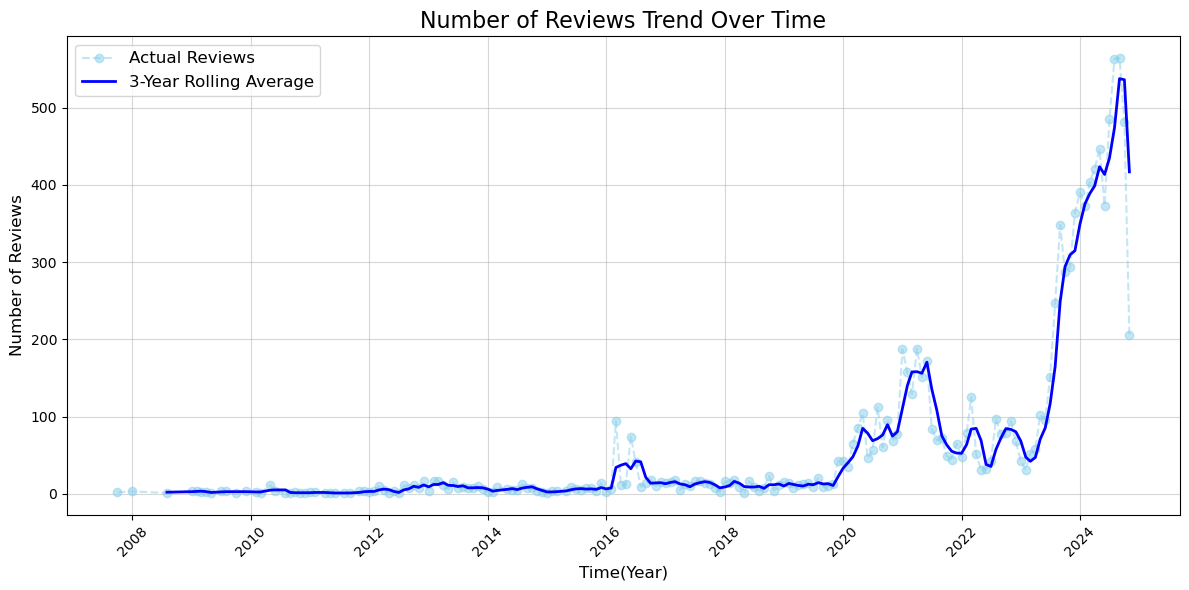

In [88]:
import matplotlib.pyplot as plt

# Convert PeriodIndex to Timestamp for plotting
reviews_over_time.index = reviews_over_time.index.to_timestamp()
rolling_avg = reviews_over_time.rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(reviews_over_time.index, reviews_over_time.values, label='Actual Reviews', alpha=0.5, color='skyblue', linestyle='--', marker='o')
plt.plot(rolling_avg.index, rolling_avg.values, label='3-Year Rolling Average', color='blue', linewidth=2)
plt.title('Number of Reviews Trend Over Time', fontsize=16)
plt.xlabel('Time(Year)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


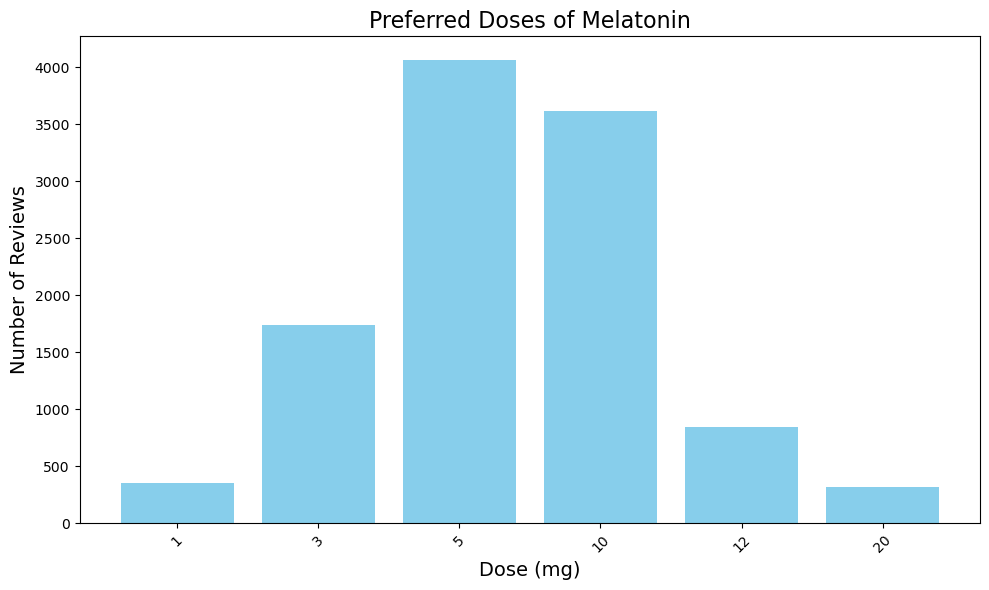

In [185]:
#20 What doses People Prefer?

df_combined = df_combined[df_combined['dose'].str.strip() != '']

# Remove 'mg'  convert it to numeric
df_combined['dose_numeric'] = pd.to_numeric(df_combined['dose'].str.replace(' mg', ''), errors='coerce')

#Drop invalid rows
df_combined = df_combined.dropna(subset=['dose_numeric'])
dose_counts = df_combined['dose_numeric'].value_counts().reset_index()
dose_counts.columns = ['dose', 'count']

# Sort and reset index
dose_counts_sorted = dose_counts.sort_values(by='dose').reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.bar(dose_counts_sorted['dose'].astype(str), dose_counts_sorted['count'], color='skyblue')
plt.title('Preferred Doses of Melatonin', fontsize=16)
plt.xlabel('Dose (mg)', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/22/zwwcnjbn3gb1gt52wl97gtxr0000gp/T/ipykernel_17527/2878186915.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_preferred_product['productName'] = most_preferred_product['productName'].apply(lambda x: ' '.join(x.split()[:5]))


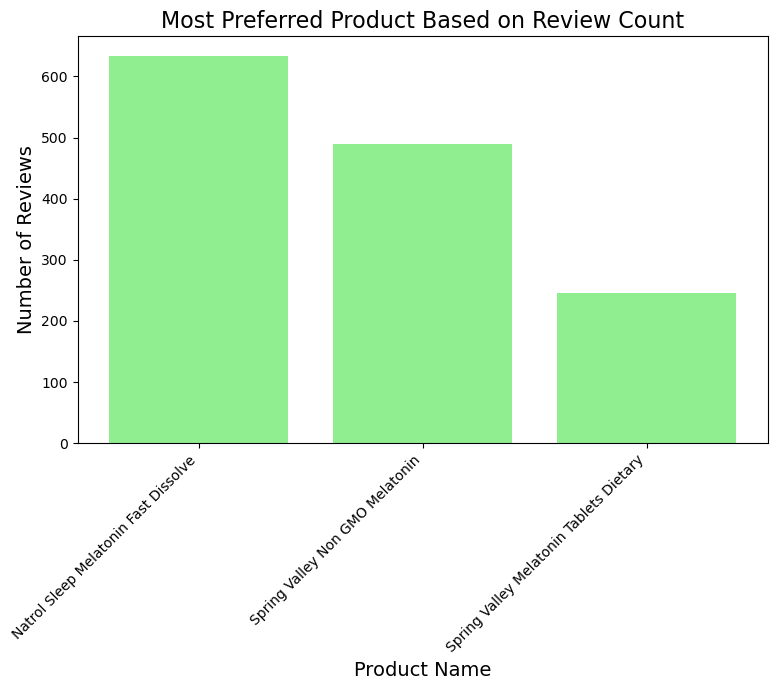

In [210]:
import matplotlib.pyplot as plt

# Aggregate by productName to count the number of reviews for each product
product_review_counts = df_combined['productName'].value_counts().reset_index()
product_review_counts.columns = ['productName', 'review_count']

# Get the top 3 most reviewed products
most_preferred_product = product_review_counts.head(3)

# Formating the productName
most_preferred_product['productName'] = most_preferred_product['productName'].apply(lambda x: ' '.join(x.split()[:5]))

plt.figure(figsize=(8, 7))
plt.bar(most_preferred_product['productName'], most_preferred_product['review_count'], color='lightgreen')
plt.title('Most Preferred Product Based on Review Count', fontsize=16)
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
